In [1]:
import matplotlib.pyplot as plt
import sympy as sp
import numpy as np

Part 1 problem no. 1 and 4 :

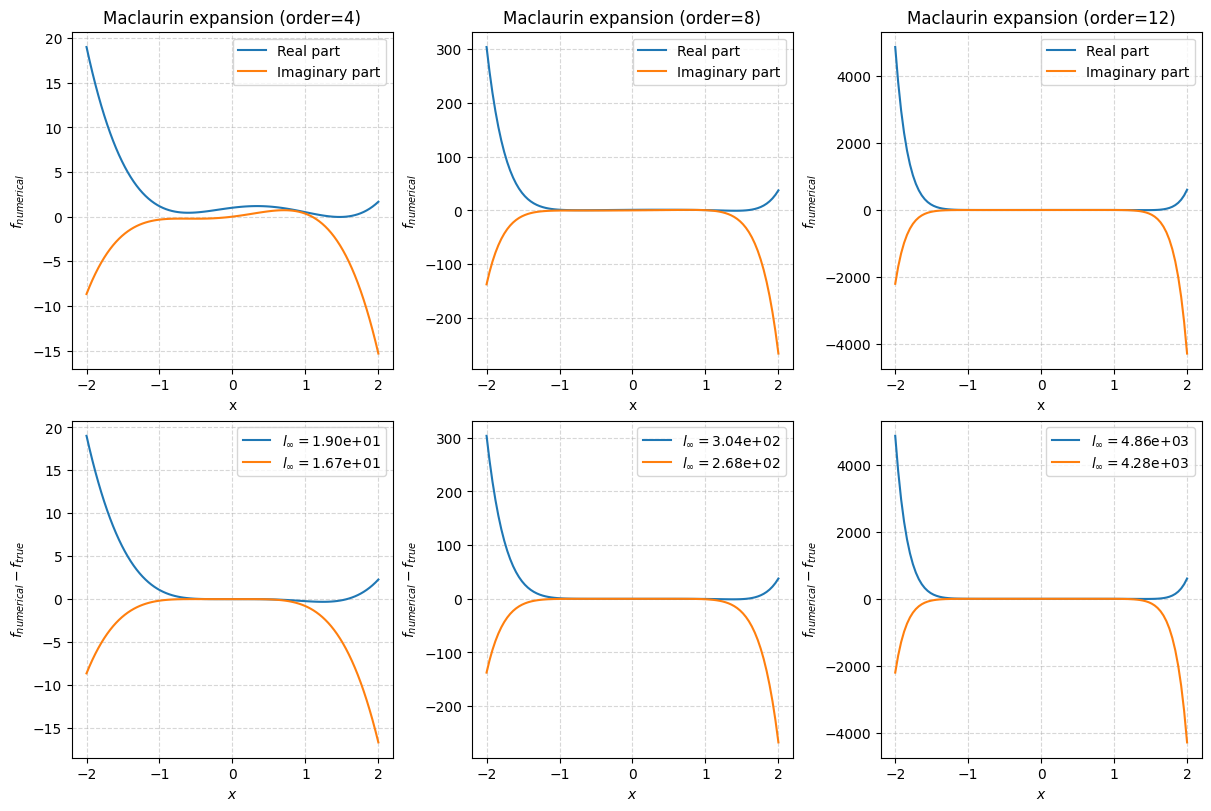

In [2]:
'''
establish variable and function.
'''

x = sp.symbols ( 'x' )
f = sp.exp ( (1 + 1j) * x ) / ( 1 + x ** 2 )

'''
numerical x interval for evaluation and true solution for comparison of
numerical approximation
'''

x_arr = np.linspace ( -2 , 2 , int ( 1e2 ))
f_arr_true = np.exp( (1 + 1j) * x_arr ) / ( 1 + x_arr ** 2 )

'''
list of derivative order for M.S.E.
'''

order_list = [ 4 , 8 , 12 ]

fig,axs = plt.subplots ( 2 , len ( order_list ),
                       figsize = ( 12 , 8 ),
                       constrained_layout = True )

expression_list = []

for idx , order in enumerate ( order_list ) :

    '''
    do a series expansion of f(x) at x=0 with order (inclusive). remove the
    omicron and simplify the expression. then, make it an evaluatable expresion
    that returns a numpy array.
    '''

    maclaurin_expansion = sp.series ( f , x , 0 , order + 1 )
    maclaurin_expansion_sympy = sp.simplify(maclaurin_expansion.removeO())
    maclaurin_expansion_func = sp.lambdify( x, maclaurin_expansion_sympy, 'numpy' )

    expression_list.append( maclaurin_expansion_sympy )

    '''
    get numerical form, and extract max norm for real and imaginary parts.
    '''

    f_arr = maclaurin_expansion_func( x_arr )
    l_inf_real = np.max( np.abs( f_arr.real-f_arr_true.real ) )
    l_inf_imag = np.max( np.abs( f_arr.imag-f_arr_true.imag ) )

    '''
    plot!
    '''

    axs[0][idx].plot( x_arr, f_arr.real, label=f'Real part' )
    axs[0][idx].plot( x_arr, f_arr.imag, label=f'Imaginary part' )
    axs[0][idx].set_title( f'Maclaurin expansion (order={order})' )
    axs[0][idx].set_xlabel('x')
    axs[0][idx].set_ylabel(r'$f_{numerical}$')
    axs[0][idx].grid(ls='--',alpha=0.5)
    axs[0][idx].legend()

    axs[1][idx].plot( x_arr, f_arr.real-f_arr_true.real,label= f'$l_\infty=${l_inf_real:.2e}' )
    axs[1][idx].plot( x_arr, f_arr.imag-f_arr_true.imag,label=f'$l_\infty=${l_inf_imag:.2e}' )
    axs[1][idx].set_xlabel('$x$')
    axs[1][idx].set_ylabel(r'$f_{numerical}-f_{true}$')
    axs[1][idx].grid(ls='--',alpha=0.5)
    axs[1][idx].legend()


In [3]:
for expr in expression_list :

    print(expr)

1.0*x**4*(0.833333333333333 - 1.0*I) - 1.0*x**3*(1.33333333333333 + 0.666666666666667*I) + 1.0*x**2*(-1 + I) + 1.0*x*(1 + I) + 1.0
1.0*x**8*(0.833730158730159 - 0.988888888888889*I) - 1.0*x**7*(1.2984126984127 + 0.634920634920635*I) + 1.0*x**6*(-0.833333333333333 + 0.988888888888889*I) + 1.0*x**5*(1.3 + 0.633333333333333*I) + 1.0*x**4*(0.833333333333333 - 1.0*I) - 1.0*x**3*(1.33333333333333 + 0.666666666666667*I) + 1.0*x**2*(-1 + I) + 1.0*x*(1 + I) + 1.0
1.0*x**12*(0.833730025118914 - 0.988897707231041*I) - 1.0*x**11*(1.29845759179093 + 0.634963924963925*I) + 1.0*x**10*(-0.833730158730159 + 0.988897707231041*I) + 1.0*x**9*(1.29845679012346 + 0.634964726631393*I) + 1.0*x**8*(0.833730158730159 - 0.988888888888889*I) - 1.0*x**7*(1.2984126984127 + 0.634920634920635*I) + 1.0*x**6*(-0.833333333333333 + 0.988888888888889*I) + 1.0*x**5*(1.3 + 0.633333333333333*I) + 1.0*x**4*(0.833333333333333 - 1.0*I) - 1.0*x**3*(1.33333333333333 + 0.666666666666667*I) + 1.0*x**2*(-1 + I) + 1.0*x*(1 + I) + 1.0

In [4]:
'''
ChatGPT 5.0 expressions from the first week of school (I forgot to take down 
the exact date and I can't find it on GPT's site.)
'''

ai_expressions = [
"1 + (1+1j)*x + (-1+1j)*x**2 + (-4/3 - (2/3)*1j)*x**3 + (5/6 - 1j)*x**4",
"1 + (1+1j)*x + (-1+1j)*x**2 + (-4/3 - (2/3)*1j)*x**3 + (5/6 - 1j)*x**4 "
                "+ (13/10 + (19/30)*1j)*x**5 + (-5/6 + (89/90)*1j)*x**6 "
                "+ (-409/315 - (40/63)*1j)*x**7 + (2101/2520 - (89/90)*1j)*x**8",
"1 + (1+1j)*x + (-1+1j)*x**2 + (-4/3 - (2/3)*1j)*x**3 + (5/6 - 1j)*x**4 "
                "+ (13/10 + (19/30)*1j)*x**5 + (-5/6 + (89/90)*1j)*x**6 "
                "+ (-409/315 - (40/63)*1j)*x**7 + (2101/2520 - (89/90)*1j)*x**8 "
                "+ (4207/3240 + (14401/22680)*1j)*x**9 "
                "+ (-2101/2520 + (112141/113400)*1j)*x**10 "
                "+ (-202462/155925 - (44003/69300)*1j)*x**11 "
                "+ (6239969/7484400 - (112141/113400)*1j)*x**12"
]



for i in range ( len ( expression_list ) ) :
    
    sympy_expression = expression_list [ i ]
    ai_expression = sp.sympify ( ai_expressions [ i ] )

    print(f'Order {order_list[i]} comparison:')
    print(f'Sympy expression: {sympy_expression}')
    print(f'AI expression:    {ai_expression}')
    print(f'Sympy - AI {sp.simplify ( sympy_expression - ai_expression )}')
    print('')



Order 4 comparison:
Sympy expression: 1.0*x**4*(0.833333333333333 - 1.0*I) - 1.0*x**3*(1.33333333333333 + 0.666666666666667*I) + 1.0*x**2*(-1 + I) + 1.0*x*(1 + I) + 1.0
AI expression:    x**4*(5/6 - I) + x**3*(-4/3 - 2*I/3) + x**2*(-1 + I) + x*(1 + I) + 1
Sympy - AI 0

Order 8 comparison:
Sympy expression: 1.0*x**8*(0.833730158730159 - 0.988888888888889*I) - 1.0*x**7*(1.2984126984127 + 0.634920634920635*I) + 1.0*x**6*(-0.833333333333333 + 0.988888888888889*I) + 1.0*x**5*(1.3 + 0.633333333333333*I) + 1.0*x**4*(0.833333333333333 - 1.0*I) - 1.0*x**3*(1.33333333333333 + 0.666666666666667*I) + 1.0*x**2*(-1 + I) + 1.0*x*(1 + I) + 1.0
AI expression:    x**8*(2101/2520 - 89*I/90) + x**7*(-409/315 - 40*I/63) + x**6*(-5/6 + 89*I/90) + x**5*(13/10 + 19*I/30) + x**4*(5/6 - I) + x**3*(-4/3 - 2*I/3) + x**2*(-1 + I) + x*(1 + I) + 1
Sympy - AI -9.02276489854095e-17*I*x**3

Order 12 comparison:
Sympy expression: 1.0*x**12*(0.833730025118914 - 0.988897707231041*I) - 1.0*x**11*(1.29845759179093 + 0.63496

Part 1 problem no. 2 :

In [5]:
def fd_weights ( offsets , order , show_system = False ) :

    global s , A

    """
    Name          : fd_weights -> finite difference weights
    Purpose       : calculate the set of coefficients for a finite difference
                    approximation of the order-th derivative using the given
                    offsets. We are essentually solving the linear system
                    A c = b, where A is the Vandermonde matrix of the offsets,
                    c is the vector of coefficients we want to find, and b is
                    a vector of zeros with a factorial(order) in the order-th
                    position.
    Author          : christlieb, augmented by Joshua Belieu.
    Date augmented  : 2025-08-26
    Last modified   : 2025-08-26
    Inputs :
        - offsets     : list. list of offsets (in units of grid stride h)
        - order       : int. order of derivative to approximate
        - show_system : bool. if True, print the system of equations being
                        solved. default is False.
    Outputs:
        - <ret>: <type> ... <meaning/units/shape>
    Dependencies:
        - None.
    """

    '''
    list of offsets (in units of grid stride h), nsimplify allows floats.
    '''

    s = [ sp.nsimplify ( offset ) for offset in offsets ]
    m = len ( s )

    '''
    the Vandermonde matrix of the offsets. the "A" in our system Ac = b
    '''

    A = sp.Matrix ([[ s[j] ** k for j in range ( m ) ] for k in range ( m )])

    '''
    a vector of zeros with a factorial(order) in the order-th position. the 
    "b" in our system Ac = b.
    '''

    b = sp.Matrix ( [ 0 ] * m )
    b [ order ] = sp.factorial ( order )

    '''
    the coefficients we want to find. the "c" in our system Ac = b. LUsolve is 
    a decomposition method that splits A into a lower and upper triangular matrix
    and solves the system (Ux=y and Ly=c) in two steps.
    '''

    c = A.LUsolve ( b )

    if show_system :

        system = sp.Eq( sp.MatMul ( A , c , evaluate = False ) , b )
        sp.pprint(system)

    return sp.simplify ( c )

'''
unit test :    
'''

fd_weights ( [ -1 , 0 , 1 ] , 2 )


Matrix([
[ 1],
[-2],
[ 1]])

In [6]:
offsets = [ -3 , -2 , -1 , 0 , 1 ]
order = 1

weights = fd_weights ( offsets , order , True ).T
weights # the c vector here is actually d in the hw, so c would be d/h!

⎡ 1   1   1   1  1⎤ ⎡-1/12⎤   ⎡0⎤
⎢                 ⎥ ⎢     ⎥   ⎢ ⎥
⎢-3   -2  -1  0  1⎥ ⎢ 1/2 ⎥   ⎢1⎥
⎢                 ⎥ ⎢     ⎥   ⎢ ⎥
⎢ 9   4   1   0  1⎥⋅⎢-3/2 ⎥ = ⎢0⎥
⎢                 ⎥ ⎢     ⎥   ⎢ ⎥
⎢-27  -8  -1  0  1⎥ ⎢ 5/6 ⎥   ⎢0⎥
⎢                 ⎥ ⎢     ⎥   ⎢ ⎥
⎣81   16  1   0  1⎦ ⎣ 1/4 ⎦   ⎣0⎦


Matrix([[-1/12, 1/2, -3/2, 5/6, 1/4]])

In [7]:
offsets_arr = np.array ( offsets )

for i in range ( 5 + 1 ) :

    moment_i = sp.simplify ( np.sum ( np.dot ( weights , offsets_arr ** i ) ) )

    print ( f'moment {i} : {moment_i}' )



moment 0 : 0
moment 1 : 1
moment 2 : 0
moment 3 : 0
moment 4 : 0
moment 5 : 6


In [22]:
'''
function and derivative setup. used for calculation and verification.
'''

f = lambda x : np.sin ( x )
f_prime = lambda x : np.cos ( x )
x0 = 0. # expansion point/point of interest

'''
idx represents inverse power of step size. err is the container for each error.
h_arr is used later for plotting so we can see the effect of smaller stepsizes.
'''

idx_arr = np.arange ( 3 , 8 + 1 )
err_arr = np.zeros ( len ( idx_arr ) )
h_arr = 2. ** ( -idx_arr )

'''
i/o header for calculation. 
'''

head_str = f"|{'idx':^4}|{'h=2^-idx':^11}|{'approximation':^18}|{'error':^11}|{'error/h^4':^11}|"
print('='*len(head_str))
print(head_str)
print('-'*len(head_str))

'''
for each refinement level, calclulate the step size and use that to calculate
the function and its approximation via an inner product with the weights 
divided by the step size. due to the shapes approx.shape is (1,). the error
is the absolute value of the difference.
'''

for i in idx_arr :

    h = 2. ** ( -i )

    f_arr = f(x0+h*offsets_arr)
    approx = np.dot(weights,f_arr)[0] / h    
    error = np.abs(approx-f_prime(x0))
    err_arr[i-3] = error

    form_str = f"|{str(i).zfill(2):^4}|{h:^11.3e}|{approx:^18}|{error:^11.3e}|{error/h**4:^11.4e}|"
    print(form_str)
print('='*len(head_str))

|idx | h=2^-idx  |  approximation   |   error   | error/h^4 |
-------------------------------------------------------------
| 03 | 1.250e-01 | 1.00001211643246 | 1.212e-5  | 4.9629e-2 |
| 04 | 6.250e-02 | 1.00000076152118 | 7.615e-7  | 4.9907e-2 |
| 05 | 3.125e-02 | 1.00000004766154 | 4.766e-8  | 4.9977e-2 |
| 06 | 1.562e-02 | 1.00000000297989 | 2.980e-9  | 4.9994e-2 |
| 07 | 7.812e-03 | 1.00000000018626 | 1.863e-10 | 4.9999e-2 |
| 08 | 3.906e-03 | 1.00000000001164 | 1.164e-11 | 4.9999e-2 |


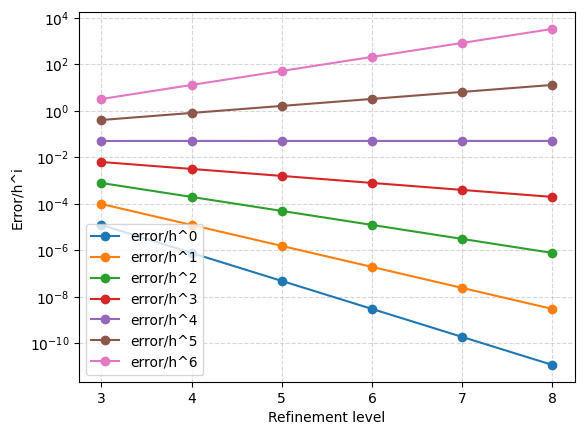

In [26]:
for i in range ( 6 + 1 ) :

    plt.plot(idx_arr, err_arr/h_arr**(i), 'o-',label=f'error/h^{i}')

# plt.xscale('log')
plt.yscale('log')
plt.grid(ls='--',alpha=0.5)
plt.xlabel('Refinement level')
plt.ylabel('Error/h^i')
plt.legend();

Part 1 Problem no. 3 : 

In [10]:
offsets13 = [ -5 , -4 , -3 , -2 , -1 , 0 ]
offsets13_arr = np.array(offsets13)
order13 = 2

weights13 = fd_weights ( offsets13 , order13 , True ).T

                                 ⎡-5/6 ⎤      
⎡  1      1     1     1   1   1⎤ ⎢     ⎥   ⎡0⎤
⎢                              ⎥ ⎢ 61  ⎥   ⎢ ⎥
⎢ -5     -4     -3   -2   -1  0⎥ ⎢ ──  ⎥   ⎢0⎥
⎢                              ⎥ ⎢ 12  ⎥   ⎢ ⎥
⎢ 25     16     9     4   1   0⎥ ⎢     ⎥   ⎢2⎥
⎢                              ⎥⋅⎢ -13 ⎥ = ⎢ ⎥
⎢-125    -64   -27   -8   -1  0⎥ ⎢     ⎥   ⎢0⎥
⎢                              ⎥ ⎢107/6⎥   ⎢ ⎥
⎢ 625    256    81   16   1   0⎥ ⎢     ⎥   ⎢0⎥
⎢                              ⎥ ⎢-77/6⎥   ⎢ ⎥
⎣-3125  -1024  -243  -32  -1  0⎦ ⎢     ⎥   ⎣0⎦
                                 ⎣15/4 ⎦      


In [11]:
'''
compound list comprehension to setup 2d list and convert to matrix object in 
sympy. just wrap the weights with the Matrix function. matrix multiply to get
moments vector (must transpose weights cause of shape shenanigans)
'''

offsets13_mat = sp.Matrix ( [ [ off ** i for off in offsets13 ] for i in range(len(offsets13)+1) ] )
weights13_mat = sp.Matrix ( weights13 )

moments = offsets13_mat*weights13_mat.T
moments

"""
results indicate k* = 6 and so,
p = k* - d = 4
"""


'\nresults indicate k* = 6 and so,\np = k* - d = 4\n'

In [12]:
f = lambda x : np.exp ( x )
f_2prime = lambda x : np.exp ( x )
x0 = 0.

idx_arr = np.arange ( 1 , 7 + 1 )
err_arr13 = np.zeros ( len ( idx_arr ) )
h_arr = 2. ** ( -idx_arr )

head_str = f"|{'idx':^4}|{'h=2^-idx':^11}|{'approximation':^18}|{'error':^11}|{'error/h^4':^11}|"
print('='*len(head_str))
print(head_str)
print('-'*len(head_str))

for i in idx_arr :

    h = 2. ** ( -i )

    f_arr = f(x0+h*offsets13_arr)
    approx13 = np.dot(weights13,f_arr)[0] / h ** 2
    error13 = np.abs(approx13-f_2prime(x0))
    err_arr13[i-3] = error13
    
    form_str = f"|{str(i).zfill(2):^4}|{h:^11.3e}|{approx13:^18}|{error13:^11.3e}|{error13/h**4:^11.4e}|"
    print(form_str)

print('='*len(head_str))

|idx | h=2^-idx  |  approximation   |   error   | error/h^4 |
-------------------------------------------------------------
| 01 | 5.000e-01 |0.982258707660812 | 1.774e-2  | 2.8386e-1 |
| 02 | 2.500e-01 |0.998208401019980 | 1.792e-3  | 4.5865e-1 |
| 03 | 1.250e-01 |0.999856240757424 | 1.438e-4  | 5.8884e-1 |
| 04 | 6.250e-02 |0.999989793598161 | 1.021e-5  | 6.6889e-1 |
| 05 | 3.125e-02 |0.999999319683411 | 6.803e-7  | 7.1336e-1 |
| 06 | 1.562e-02 |0.999999956075044 | 4.392e-8  | 7.3694e-1 |
| 07 | 7.812e-03 |0.999999997235136 | 2.765e-9  | 7.4219e-1 |


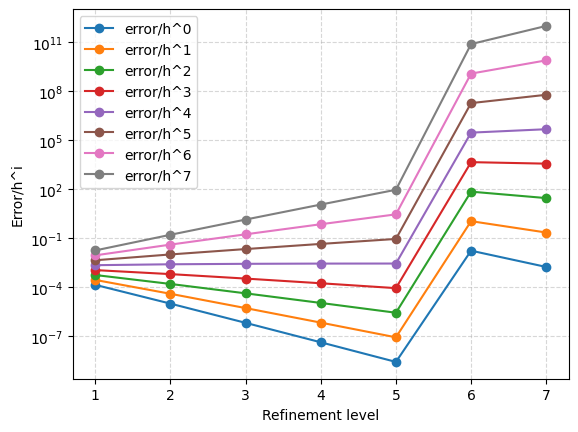

In [13]:
for i in range ( 7 + 1 ) :

    plt.plot(idx_arr, err_arr13/h_arr**(i), 'o-',label=f'error/h^{i}')

# plt.xscale('log')
plt.yscale('log')
plt.grid(ls='--',alpha=0.5)
plt.xlabel('Refinement level')
plt.ylabel('Error/h^i')
plt.legend();

Part 2 : The Non-Uniform Grid

In [144]:
f = lambda x : np.cos ( x )
f_2prime = lambda x : -np.cos ( x )
x2 = 0

H_lower = 1e-4
H_upper = 1e-1
H_arr = np.linspace ( H_lower , H_upper , int ( 5e2 ) )

error_list = []

rng = np.random.default_rng()
for H_val in H_arr :
    
    h1,h2,h3 = rng.uniform(0.,H_val,size=3)
    h_arr = np.array([ -h1,0,h2,h2+h3 ])
    f_arr = f(x2+h_arr)

    c1, c2, c3, c4 = sp.symbols('c1 c2 c3 c4')

    eq1 = sp.Eq(c1 + c2 + c3 + c4, 0) 
    eq2 = sp.Eq(-h1*c1 + h2*c3 + (h2+h3)*c4, 0)
    eq3 = sp.Eq((h1**2*c1 + h2**2*c3 + (h2+h3)**2*c4)/2, 1)
    eq4 = sp.Eq((-h1**3*c1 + h2**3*c3 + (h2+h3)**3*c4)/6, 0)

    c_vec = sp.solve([eq1, eq2, eq3, eq4], [c1, c2, c3, c4])

    '''
    convert sympy floats/array to numpy floats/array because np.log doesnt
    like sympy floats/arrays :(.
    '''

    c_arr = np.array([ float(c_vec[c]) for c in (c1,c2,c3,c4) ])
    approx = np.dot(c_arr,f_arr)
    error = np.abs(approx - f_2prime(x2))
    error_list.append(error)

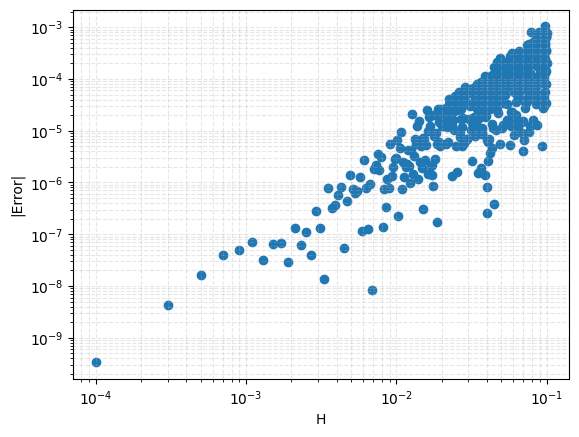

In [145]:
plt.scatter(H_arr,error_list)

plt.xlabel('H')
plt.ylabel('|Error|')
plt.grid(ls='--',which='both',alpha=0.3)
plt.xscale('log')
plt.yscale('log')

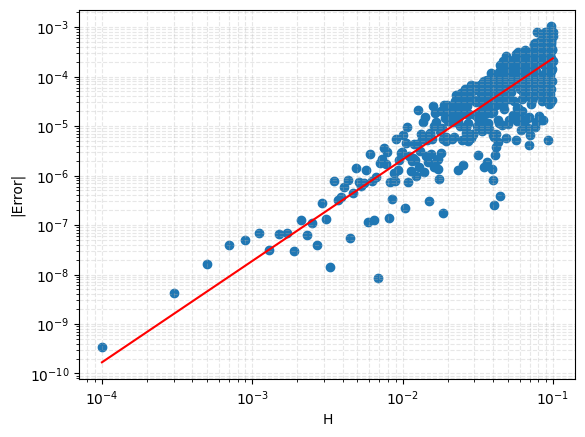

In [162]:
A = np.column_stack ( [np.ones_like(H_arr),np.log(H_arr)] )
b = np.log ( error_list )
x = np.linalg.lstsq ( A , b ,rcond=None)

K,p = x[0]

plt.scatter(H_arr,error_list)
plt.plot(H_arr,np.exp(K)*H_arr**p,color='red')
plt.xlabel('H')
plt.ylabel('|Error|')
plt.grid(ls='--',which='both',alpha=0.3)
plt.xscale('log')
plt.yscale('log')